<div style="text-align: center;">

# **Algoritmia Cuantica** 
# Periodicidad con dos Qbits  
  
<font size="2">

##### Daniel Amauri Vázquez Gutiérrez
</font>

Nuestro objetivo es encontrar la $r>0$ minima tal quepara una funcion cualquiera:  

$$f(x+r)=f(x)$$ 

Donde claramente $r$ es nuestro **fase** . Para lograr esto podemos comenzar con estado : 

$$|\Psi_0\rangle = |0\rangle^{\otimes t}|0\rangle^{\otimes s}$$

Siendo $t$ el numero de *Qbits de estimacion* y $s$ el numero de *Qbits de apoyo*. Para que sea efectivo el algortimo notemos las siguientes  relaciones de los numeros que podemos generar: 



$$r\leq 2^{s} < 2^{2s}\leq 2^{t}=\leq 2^{2s+1}$$  

Por lo que ajustando , podemos hacer que : 

$$t=2s$$





Luego buscamos una superposicion de estados empleando compuertas de hadamard en los Qbits de estimacion.  

$$|\Psi_1\rangle =(H^{\otimes t}\otimes I^{\otimes s} )|0\rangle^{\otimes t}|0\rangle^{\otimes s}= \frac{1}{2^{t/2}}\sum^{2^t-1}_{k=0}|k\rangle|0\rangle^{\otimes s}$$

Ahora tomamos en cuenta el hecho de que :

$$|x\rangle |y\rangle \rightarrow |x\rangle |y \oplus f(x) \rangle $$

Entonces , un caso especial de este seria cuando $y=0$, dando :  
$$|x\rangle |0\rangle \rightarrow |x\rangle | f(x) \rangle $$

En este punto hay que hacer un **oraculo especifico** para  que se cree este movimiento segun sea el tipo de funcion periodica que tengamos . Especificamente  en este programa con dos Qbits , unicamente nos limitaremos a  usar una compuerta controlada 

Comenzamos importando las bibliotecas nesesarias asi como dfiniendo nuestra porpia compuerta $QFT$

In [1]:
#Bloque de importacion
import numpy as np 
import math
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer #Aer es un modulo de Qiskit que proporciona simuladores cuanticos para ejecutarlos de manera local.  
from qiskit.quantum_info import Statevector,DensityMatrix
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from qiskit.circuit import Gate

import qiskit 
print(qiskit.version.get_version_info()) 

1.2.0


In [3]:
# Definir la compuerta personalizada que realiza la Transformada Cuantica 
class QFT(Gate):
    def __init__(self, s):
        # n es el numero que será representado en binario, s es el número de qubits
        super().__init__('QFT_CUSTOM', s,[])  # La etiqueta de la compuerta y el número de qubits
        self.s = s
        
       

    def _define(self):
        qc = QuantumCircuit(self.s)

        # Aplicar la Transformada Cuantica de Fourier 
        for j in range(self.s):
            qc.h(self.s - (j + 1))
            if self.s - (j + 1) > 0:
                for k in range(self.s - (j + 1)):
                    l = self.s - (j + 1) - 1 - k
                    qc.cp(2 * np.pi / (2 ** (self.s - j - l)), l, self.s - (j + 1))

        # Aplicar los swaps necesarios
        if self.s % 2 == 1:
            for l in range((self.s - 1) // 2):
                qc.swap(l, self.s - 1 - l)
        else:
            for l in range(self.s // 2):
                qc.swap(l, self.s - 1 - l)

        self.definition = qc  

In [4]:
#Transformada Cuantica de Fourier Inversa  

class IQFT(Gate):
    def __init__(self, s):
        # n es el numero que será representado en binario, s es el número de qubits
        super().__init__('IQFT_CUSTOM', s, [])  # La etiqueta de la compuerta y el número de qubits
        self.s = s
        

    def _define(self):
         qc = QuantumCircuit(self.s)
 
         #Primero volvemos a Switchear 
         if self.s % 2 == 1:
               for l in range((self.s - 1) // 2):
                  qc.swap(l, self.s - 1 - l)
         else:
               for l in range(self.s // 2):
                  qc.swap(l, self.s - 1 - l)


            #Volvemos a añadir las compuertas pero ahora en un sentido invertido 

         for j in range(self.s):  
               qc.h(j)

               if j<(self.s-1):
                  for k in range(j+1):
                     qc.cp(2*np.pi/(-2**(k+2)),j+1,j-k)   

         
            #Agragamos este SWAP que no deberia ser nesesario , sin embargo , lo ponemos dado que esto nos permite ver los estados de los Qbits en un orden
            #usal en el que vemos los numeros binarios y asi poderlo comparar con el arreglo original que producimos al inicializar el circuito. 

         
         self.definition = qc  

In [5]:
# SWAP  cumtomizado  
class SWAP(Gate):
    def __init__(self, s):
        # n es el numero que será representado en binario, s es el número de qubits
        super().__init__('SWAP_CUSTOM', s, [])  # La etiqueta de la compuerta y el número de qubits
        self.s = s
        

    def _define(self):
         qc = QuantumCircuit(self.s)
 
         #Primero volvemos a Switchear 
         if self.s % 2 == 1:
               for l in range((self.s - 1) // 2):
                  qc.swap(l, self.s - 1 - l)
         else:
               for l in range(self.s // 2):
                  qc.swap(l, self.s - 1 - l)


         
         self.definition = qc  

In [10]:

qc = QuantumCircuit(3,2)  #Tenemso dos qbits, dos de estimacion y otro de apoyo

iqft_1=IQFT(2) #Unicamente aplicaremos la compuerta a 2 de los 3 qbits que utilizaremos 

# Aplicar la compuerta personalizada solo a los a  algunos qbits 
qc.h([0,1]) 
qc.cx(1,2)



Entonces, aplicando este **Oraculo** , que llamaremos $U_o$ entonces, conseguimos :  

$$|\Psi_2\rangle = U_o |\Psi_1\rangle = \frac{1}{2^{t/2}}\sum^{2^t-1}_{k=0}|k\rangle|f(k)\rangle

Ahora, aqui es donde nos topamos con una **limitacion** importantisima de este algoritmo, y este es que para que funcione correctamente , forzosamente $r$ tiene que ser de la forma:  

$$r=2^j  , j \in \mathbb{N}$$



Pero , ¿Por que? , bien , hay dos formas de verlo : 

1. **QFT version**

 Debido a que de esta forma , podemos ver que la forma de $|f(k)\rangle$ la podemos manipular como si la vieramos ya transformada  por una $QFT$ , de esta forma podriamos ver que  en primer lugar la $QFT$ tiene la forma : 

$$QFT |x \rangle = \frac{1}{2^{\frac{n}{2}}}\sum^{2^n-1}_{y=0}e^{\frac{2\pi i xy}{2^n}}|y\rangle$$ 

Mientras que nosotros le veremos la forma a $|f(k)\rangle$ como sigue: 

$$|f(k)\rangle = \frac{1}{r^{1/2}}\sum^{r-1}_{z=0} e^{\frac{2\pi i k z}{r}} |\hat{f}(z)\rangle $$

Una pregunta aqui seria ... ¿Por que ? ¿Por que es que  podemos hacer esta equibalencia ? ¿por que el $2^{n}$  es exactamente el periodo $r$?. Pues bien , por que el valor de $2^{n}$ es el valor maximo que puede tener  en  decimal  los digitos que  en binario que  que estan siendo tranformados o en tranformacion  por la tranformada de Fourier. 

Como nuestro Oraculo $U_o$ unicamente hace que  va de $0$ hasta un valor maximo $r$ que es igual al periodo , entonces , nesesariamente el periodo $r$ se codifica al hacer esta accion. 

Con esta igualdad , entonces, podemos tranformar $|\Psi_2\rangle$ como sigue : 

$$|\Psi_2\rangle =\frac{1}{r^{1/2}} \frac{1}{2^{t/2}}\sum^{r-1}_{z=0} \sum^{2^t-1}_{k=0}e^{\frac{2\pi i k z}{r}}|k\rangle |\hat{f}(z)\rangle $$

Por ultimo aplicamos una $IQFT$ a los qbits  del primer registro, a los de estimacion, recordando que : 

$$IQFT |y \rangle = \frac{1}{2^{\frac{n}{2}}}\sum^{2^n-1}_{x=0}e^{\frac{-2\pi i yx}{2^n}}|x\rangle$$

$$|\Psi_3\rangle = IQFT |\Psi_2 \rangle = \frac{1}{r^{1/2}} \sum^{r-1}_{z=0} \Big[ IQFT \Big(\frac{1}{2^{t/2}}\sum^{2^t-1}_{k=0}e^{\frac{2\pi i k z}{r}}|k\rangle \Big)|\hat{f}(z)\rangle \Big]$$

Veamos que : 

$$\frac{2\pi i xy}{2^n}\rightarrow \frac{2\pi i zk}{r}$$

Entonces: 

$$\frac{x}{2^n}\rightarrow \frac{z}{r} $$

Luego entonces, midiendo nuestros qbits de estimacion  , obtenemos : 

$$|x\rangle = 2^t \frac{z}{r} $$

Donde $z$  es un numero entero aleatorio tal que $z\in\{0,r-1\}$. Entonces: 

$$|\Psi_4\rangle =  \frac{1}{r^{1/2}} \sum^{r-1}_{z=0} \Big[ |x\rangle |\hat{f}(z)\rangle \Big]$$

2. **IQFT version**

Pero tambien notamos que especificamente en este problema podemos aplicar una $QFT$ en vez de una $IQFT$ , veamos en el siguiente desarrollo por que ,tenemos : 



$$IQFT |y \rangle = \frac{1}{2^{\frac{n}{2}}}\sum^{2^n-1}_{x=0}e^{\frac{-2\pi i yx}{2^n}}|x\rangle$$




Mientras que nosotros le veremos la forma a $|f(k)\rangle$ , como sigue: 

$$|f(k)\rangle = \frac{1}{r^{1/2}}\sum^{r-1}_{z=0} e^{\frac{-2\pi i k z}{r}} |\hat{f}'(z)\rangle $$

Con esta igualdad , entonces, podemos tranformar $|\Psi_2\rangle$ como sigue : 

$$|\Psi'_2\rangle =\frac{1}{r^{1/2}} \frac{1}{2^{t/2}}\sum^{r-1}_{z=0} \sum^{2^t-1}_{k=0}e^{\frac{-2\pi i k z}{r}}|k\rangle |\hat{f'}(z)\rangle $$

Por ultimo aplicamos una $IQFT$ a los qbits  del primer registro, a los de estimacion, recordando que : 

$$QFT |y \rangle = \frac{1}{2^{\frac{n}{2}}}\sum^{2^n-1}_{x=0}e^{\frac{2\pi i yx}{2^n}}|x\rangle$$

$$|\Psi'_3\rangle = QFT |\Psi_2 \rangle = \frac{1}{r^{1/2}} \sum^{r-1}_{z=0} \Big[ QFT \Big(\frac{1}{2^{t/2}}\sum^{2^t-1}_{k=0}e^{\frac{-2\pi i k z}{r}}|k\rangle \Big)|\hat{f}'(z)\rangle \Big]$$

Veamos que : 

$$\frac{-2\pi i xy}{2^n}\rightarrow \frac{-2\pi i zk}{r}$$

Entonces: 

$$\frac{x}{2^n}\rightarrow \frac{z}{r} $$

Luego entonces, midiendo nuestros qbits de estimacion  , obtenemos : 

$$|x\rangle = 2^t \frac{z}{r} $$

Donde $z$  es un numero entero aleatorio tal que $z\in\{0,r-1\}$. Entonces: 

$$|\Psi_4\rangle =  \frac{1}{r^{1/2}} \sum^{r-1}_{z=0} \Big[ |x\rangle |\hat{f}'(z)\rangle \Big]$$

Al final , sin importar si utilizamos la version 1 o la 2 , lo importante es notar que  al final nos interesa unicamente medir los *qbits de estimacion*, mientras que los qbits de apoyo  unicamente complican el manejo de los datos (*Al medir los qbits de estimacion , como estan entrelazados con los qbits de apoyo, indirectamente tambien se estan colapsando los qbits de apoyo, ¿cierto?*). 

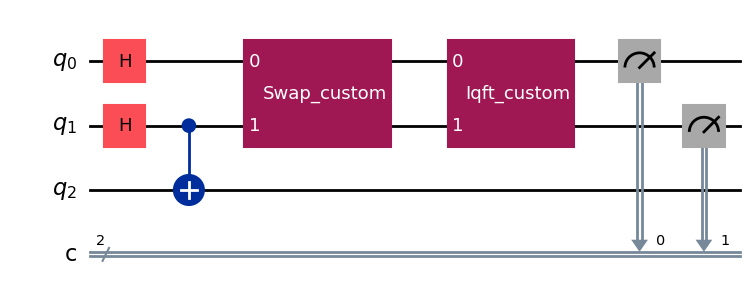

In [11]:
qc.append(SWAP(2),[0,1])
qc.append(iqft_1, [0,1])   


#Estas ultimas compuertas SWAP las aplico solo para que  el como obtenemos los qbits concuerde con la convencion de orden en el codigo binario del que estamos acostumbrado. 


qc.measure(range(2), range(2))

qc.draw('mpl')

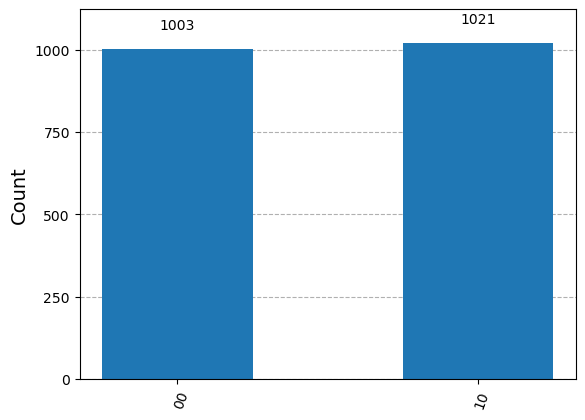

In [19]:
#------Obtencion del histograma ----------------

backend=Aer.get_backend('qasm_simulator')  
#podemos cambiar a 'qasm_simulator' , ya que 'statevector_simulator' no es compatible con mediciones clasicas

compilado=transpile(qc, backend)  
#transpile es una funcion que optimiza el circuito cuantico para que sea compatible con el backend seleccionado. 

job=backend.run(compilado, shots=2024)  
#Ejecutamos el circuito cuantico 
#Shots, especifica cuantas veces se ejecuta el circuito cuantico ( recordemos que la cuantica es probabilistica)

result=job.result() #Obtiene los resultados del lo anterior

# Graficamos el histograma de resultados
plot_histogram(result.get_counts()) 

In [21]:
counts = result.get_counts()
# Encuentra el valor más obtenido
valor_mas_obtenido = max(counts, key=counts.get)
cuenta_maxima = counts[valor_mas_obtenido] 
# Omite el qubit 2 y toma solo los qubits 0 y 1
valor_sin_qubit_2 = valor_mas_obtenido  

# Convertir el valor sin el qubit 2 de binario a decimal
valor_decimal = int(valor_sin_qubit_2, 2)

print(f"El valor más obtenido en binario es: {valor_sin_qubit_2 } con {cuenta_maxima} veces.") 
print(f"El valor más obtenido en decimal  es: {valor_decimal} con {cuenta_maxima} veces.")

El valor más obtenido en binario es: 10 con 1021 veces.
El valor más obtenido en decimal  es: 2 con 1021 veces.


Con esta informacion , ahora tenemos que expandir nuestro conocimiento aprendiendo obre un algortimo clasico que emplearemos como subrutina en  este, y ese es el **Algoritmo de fraccion continua** . 

es un método para expresar números reales, racionales o irracionales, como fracciones continuas. Una fracción continua es una expresión del tipo: 

$$w= a_0 +\frac{1}{a_1 +\frac{1}{a_2 +\frac{1}{a_3+...}}}$$

donde $a_i\in \mathbb{Z}$ , con $i\in\mathbb{N}$ , son llamados *terminos de la fraccion continua*, especialmente util para encontralar aproximaciones  racionales cercanas a un numero irracional.  

Nuestro objetivo aqui es que , sabiendo ya el valor de $|x\rangle $ en decimal , y conociendo $t$ , numero de *qbits de estimacion* y $z$,  un numero entero aleatorio tal que $z\in\{0,r-1\}$ , entonces por medio de este algoritmo , podamos obtener una fraccion tal que :  

$$\frac{x}{2^t}=w\approx \frac{l}{g}=\frac{z}{r}$$ 

Entonces al final del algoritmo obtenemos $l$ y $g$, como conocemos cuanto vale $s$, podemos deducir un estimado de $r$, nuestro **periodo**.


Este algoritmo para obtener los numeros que pueden formar este numero , aun siendo clasico es bastante eficiente  y no hay tanto problema  en el tiempo computacional. 

In [ ]:
from fractions import Fraction

def continued_fraction(x, max_iterations=100):
    #Devuelve los coeficientes de la fracción continua de x
    cf = []  # Lista para almacenar los coeficientes de la fracción continua
    while max_iterations > 0:
        # Obtener la parte entera
        a = int(x) #redondea al menor entero cercano
        cf.append(a) #añade a a a la lista cf
        
        # Calcular el resto
        x = x - a
        
        # Si el resto es cero, hemos terminado
        if x == 0:
            break
        
        # Tomamos el recíproco del resto para continuar la fracción continua
        x = 1 / x
        max_iterations -= 1
    
    return cf

def approximate_fraction(cf):
    """Toma los coeficientes de una fracción continua y devuelve la aproximación como una fracción."""
    n = len(cf)
    
    # Manejo especial si la fracción continua es muy pequeña
    if n == 0:
        return Fraction(0)
    
    # Inicializamos con la última fracción (el último término)
    frac = Fraction(cf[-1])
    
    # Empezamos a recorrer los términos de la fracción continua en orden inverso
    for a in reversed(cf[:-1]):
        frac = a + 1 / frac
    
    return frac


x = valor_decimal/2**2 # Aproximación decimal
cf = continued_fraction(x)  # Calculamos los coeficientes de la fracción continua
approx_frac = approximate_fraction(cf)  # Obtenemos la fracción aproximada
r=approx_frac.denominator

print("Fracción continua:", cf)
print("Fracción aproximada:", approx_frac) 
print("La fase es :",r)



Fracción continua: [0, 2]
Fracción aproximada: 1/2
La fase es : 2


<font size="6">

**Preguntas y dudas(existenciales)**
</font>

Durante el desarrollo de este algoritmo para encontral el periodo, por mas que intente replicar el  algoritmo plasmado en las notas: 

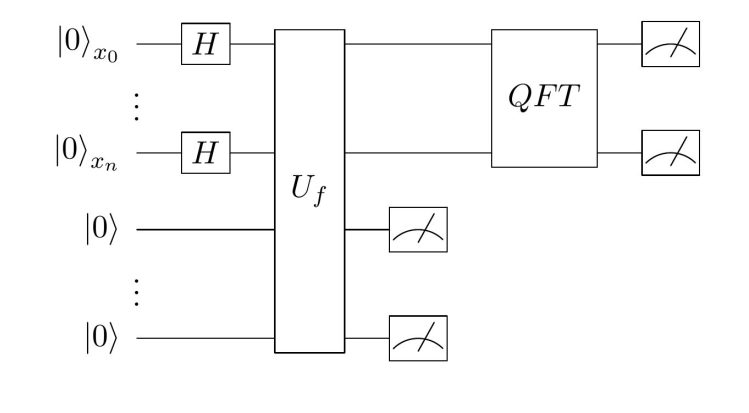 


Ciertamente no fui capas de obtener resultados coherentes midiendo todos los qbits , sin embargo, aplicando despues del oraculo , una QFT inversa junto  y  midiendo unicamente  los Qbits de estimacion , pude obtener el resultado correcto siguieno la idea  que se encuntra en algunos sitios de internet . 

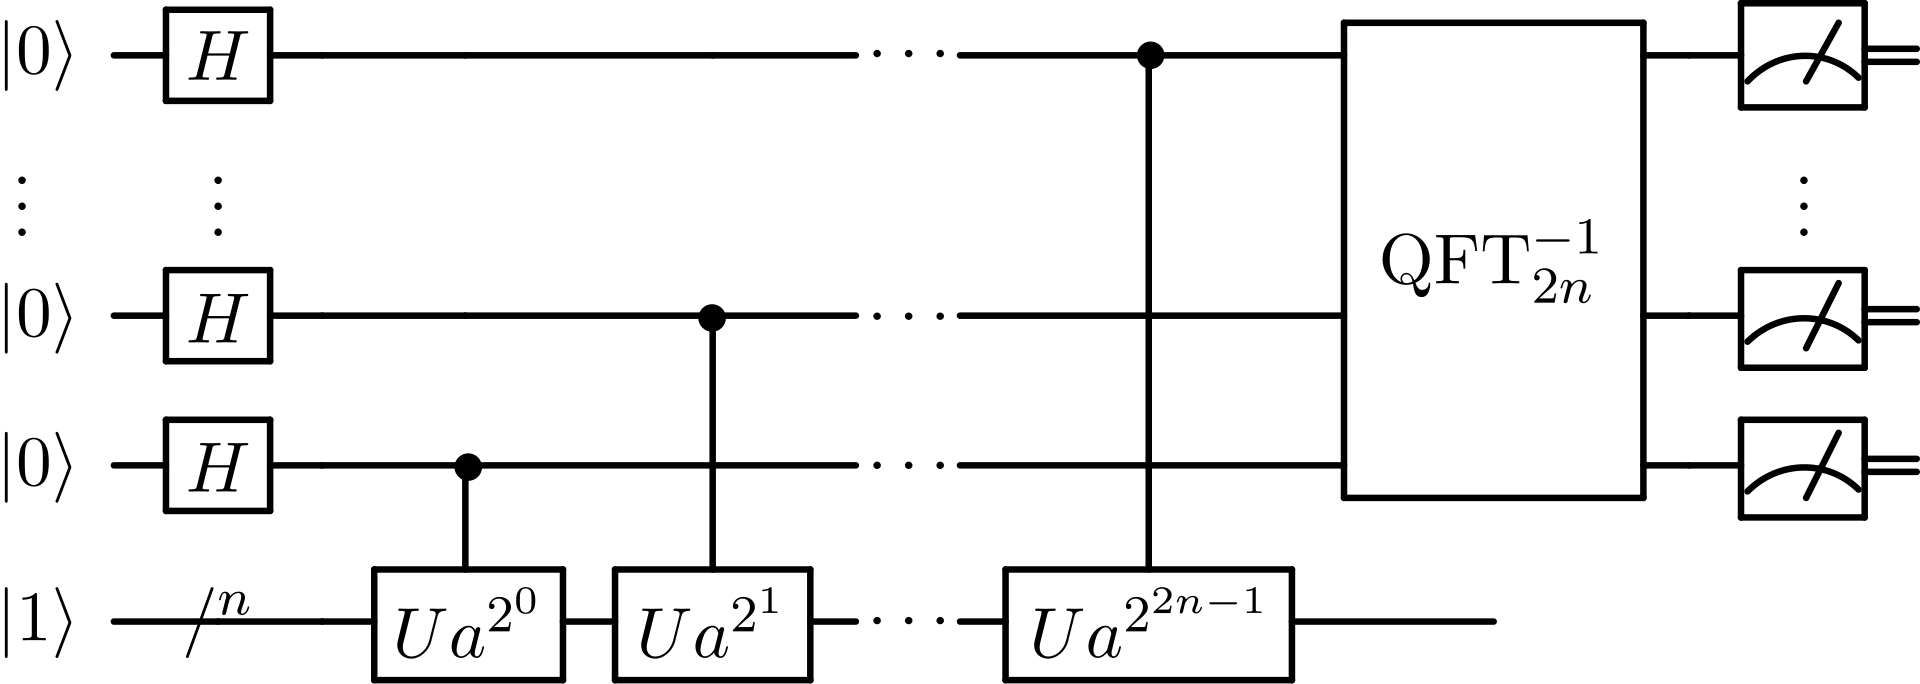 


Aun que en esta imagen se emplea el algoritmo de *Quantum Phase Estimation* para obtener el periodo , sigue siendo funciono  correctamente la idea. 

Mi pregunta entonces es , que puedo modificar en el codigo que hice para poder emplear el circuito que ustedes  dieron? ¿Creen que puedan pasar un codigo en el que se implemente correctamente?
